In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors  import KNeighborsClassifier
#from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
bc=pd.read_csv('../input/breast-cancer-dataset/breast-cancer-wisconsin.csv')

In [3]:
bc.head()

,sample_code,clump_thickness,cell_size,cell_shape,marg_adhes,epi_cell_size,bare_nuc,bland_chr,normal_nuc,motoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
bc.isnull().sum()

sample_code        0
clump_thickness    0
cell_size          0
cell_shape         0
marg_adhes         0
epi_cell_size      0
bare_nuc           0
bland_chr          0
normal_nuc         0
motoses            0
class              0
dtype: int64

In [5]:
bc=bc.drop(columns=['bare_nuc'])

In [6]:
x=bc.iloc[:,0:9]
y=bc.iloc[:,9]


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [8]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,12)
neighbors
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [9]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)
    

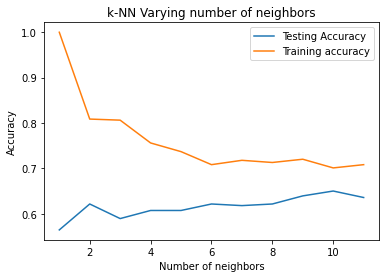

In [10]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [11]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=10)
#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [12]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(x_test,y_test)

0.65

In [13]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[155,  24],
       [ 74,  27]])